# Star Wars Fans - An Exploration
Data from a survey put out by Five Thirty Eight on the Star Wars franchise and 
people's opinions on the movies and characters.

# Preparing the data for visualizations
The data comes in an ugly CSV that's not ready to be made into graphs - let's 
fix that!

In [377]:
# importing packages that will help us process, visualize, and model our data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

plt.rcParams['figure.dpi']= 120

# some settings that make it easy to view the data
pd.set_option('display.max_columns', 50)

In [328]:
# read our data into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv', 
            encoding = "ISO-8859-1")

In [329]:
# what does our data look like? We can preview the first five rows.
df.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [330]:
# columns have unhelpful names, so we'll rename them
df.columns = ['RespondentID','seen_any_films','fan','seen_episodeI',
              'seen_episodeII', 'seen_episodeIII', 'seen_episodeIV', 
              'seen_episodeV','seen_episodeVI','epI_preference',
              'epII_preference', 'epIII_preference', 'epIV_preference', 
              'epV_preference','epVI_preference','favor_han_solo',
              'favor_luke', 'favor_leia', 'favor_anakin', 'favor_obi_wan', 
              'favor_palpatine', 'favor_darth_vader', 'favor_lando', 
              'favor_boba_fett','favor_c3po', 'favor_r2d2', 
              'favor_jar_jar_binks', 'favor_padme','favor_yoda', 
              'who_shot_first','familiar_with_expanded_uni','expanded_uni_fan',
              'startrek_fan','gender', 'age', 'household_income', 'education',
              'census_region']

# first row is also a header column so we don't need it, therefore, we drop it
df.drop(0, inplace=True)

In [331]:
# should be easier to understand now! Let's look at the first five rows again.
df.head(5)

,RespondentID,seen_any_films,fan,seen_episodeI,seen_episodeII,seen_episodeIII,seen_episodeIV,seen_episodeV,seen_episodeVI,epI_preference,epII_preference,epIII_preference,epIV_preference,epV_preference,epVI_preference,favor_han_solo,favor_luke,favor_leia,favor_anakin,favor_obi_wan,favor_palpatine,favor_darth_vader,favor_lando,favor_boba_fett,favor_c3po,favor_r2d2,favor_jar_jar_binks,favor_padme,favor_yoda,who_shot_first,familiar_with_expanded_uni,expanded_uni_fan,startrek_fan,gender,age,household_income,education,census_region
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [332]:
df[df.seen_any_films != 'Yes'].head()

,RespondentID,seen_any_films,fan,seen_episodeI,seen_episodeII,seen_episodeIII,seen_episodeIV,seen_episodeV,seen_episodeVI,epI_preference,epII_preference,epIII_preference,epIV_preference,epV_preference,epVI_preference,favor_han_solo,favor_luke,favor_leia,favor_anakin,favor_obi_wan,favor_palpatine,favor_darth_vader,favor_lando,favor_boba_fett,favor_c3po,favor_r2d2,favor_jar_jar_binks,favor_padme,favor_yoda,who_shot_first,familiar_with_expanded_uni,expanded_uni_fan,startrek_fan,gender,age,household_income,education,census_region
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
12,3.292635e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,3.292448e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",High school degree,East South Central
35,3.292298e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,30-44,"$50,000 - $99,999",Graduate degree,East South Central
47,3.292202e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Male,18-29,"$0 - $24,999",High school degree,Pacific


It seems like the if the respondent hadn't watched any Star Wars films, they were automatically directed to demographic questions, so we'll have to be careful of that when we're creating visualizations.

In [333]:
# replace all the NaN values with 0 and everything else with 1 in seen_episode
# columns to indicate 'yes I've seen it' or 'no I haven't
df['seen_episodeI'] = np.where(df.seen_episodeI == 'Star Wars: Episode I  The Phantom Menace', 1, 0)
df['seen_episodeII'] = np.where(df.seen_episodeII == 'Star Wars: Episode II  Attack of the Clones', 1, 0)
df['seen_episodeIII'] = np.where(df.seen_episodeIII == 'Star Wars: Episode III  Revenge of the Sith', 1, 0)
df['seen_episodeIV'] = np.where(df.seen_episodeIV == 'Star Wars: Episode IV  A New Hope', 1, 0)
df['seen_episodeV'] = np.where(df.seen_episodeV == 'Star Wars: Episode V The Empire Strikes Back', 1, 0)
df['seen_episodeVI'] = np.where(df.seen_episodeVI == 'Star Wars: Episode VI Return of the Jedi', 1, 0)

Below, we can see that all of the movie title have been replaced with 1's to 
indicate that the respondent has seen the movie.

In [334]:
df.head()

,RespondentID,seen_any_films,fan,seen_episodeI,seen_episodeII,seen_episodeIII,seen_episodeIV,seen_episodeV,seen_episodeVI,epI_preference,epII_preference,epIII_preference,epIV_preference,epV_preference,epVI_preference,favor_han_solo,favor_luke,favor_leia,favor_anakin,favor_obi_wan,favor_palpatine,favor_darth_vader,favor_lando,favor_boba_fett,favor_c3po,favor_r2d2,favor_jar_jar_binks,favor_padme,favor_yoda,who_shot_first,familiar_with_expanded_uni,expanded_uni_fan,startrek_fan,gender,age,household_income,education,census_region
1,3.292880e+09,Yes,Yes,1,1,1,1,1,1,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,1,1,1,0,0,0,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,1,1,1,1,1,1,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,1,1,1,1,1,1,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [335]:
df.dtypes

RespondentID                  float64
seen_any_films                 object
fan                            object
seen_episodeI                   int64
seen_episodeII                  int64
seen_episodeIII                 int64
seen_episodeIV                  int64
seen_episodeV                   int64
seen_episodeVI                  int64
epI_preference                 object
epII_preference                object
epIII_preference               object
epIV_preference                object
epV_preference                 object
epVI_preference                object
favor_han_solo                 object
favor_luke                     object
favor_leia                     object
favor_anakin                   object
favor_obi_wan                  object
favor_palpatine                object
favor_darth_vader              object
favor_lando                    object
favor_boba_fett                object
favor_c3po                     object
favor_r2d2                     object
favor_jar_ja

We see that the preferences aren't a numeric type -- we'll fix that.

In [336]:
for episode in ['epI_preference','epII_preference','epIII_preference',
                 'epIV_preference','epV_preference', 'epVI_preference']:
    df[episode] = pd.to_numeric(df[episode])

RespondentID                  float64
seen_any_films                 object
fan                            object
seen_episodeI                   int64
seen_episodeII                  int64
seen_episodeIII                 int64
seen_episodeIV                  int64
seen_episodeV                   int64
seen_episodeVI                  int64
epI_preference                float64
epII_preference               float64
epIII_preference              float64
epIV_preference               float64
epV_preference                float64
epVI_preference               float64
favor_han_solo                 object
favor_luke                     object
favor_leia                     object
favor_anakin                   object
favor_obi_wan                  object
favor_palpatine                object
favor_darth_vader              object
favor_lando                    object
favor_boba_fett                object
favor_c3po                     object
favor_r2d2                     object
favor_jar_ja

# Creating Visualizations
Now that the data is cleaned up a bit, we can create visualizations to 
understand what the data is telling us a bit better.
## How many people watched each movie? 

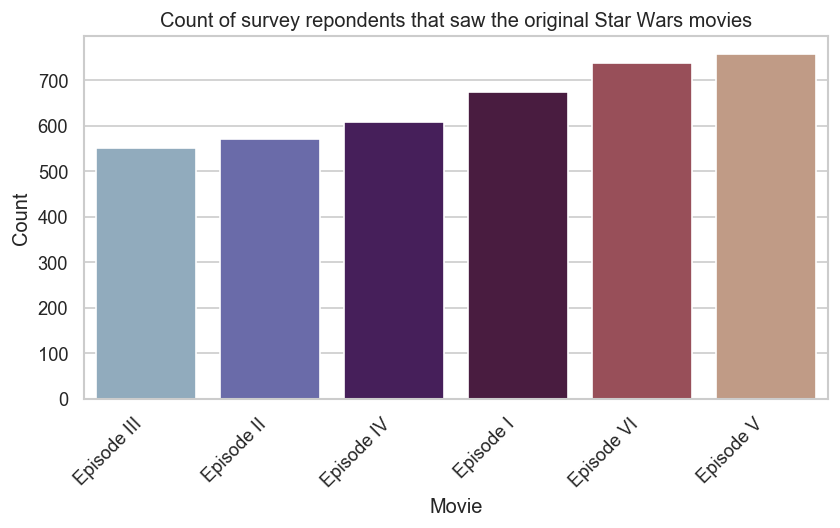

In [364]:
# plotting how many folks watched each movie
plt.figure(figsize=(8,4))
chart = sns.barplot(x=['Episode III', 
                       'Episode II', 
                       'Episode IV', 
                       'Episode I',
                       'Episode VI',
                       'Episode V'], 
                    y=df[['seen_episodeI', 'seen_episodeII', 'seen_episodeIII', 
                      'seen_episodeIV', 'seen_episodeV', 
                      'seen_episodeVI']].sum().sort_values(),
                    palette='twilight')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right")
plt.xlabel("Movie")
plt.ylabel("Count")
plt.title("Count of survey repondents that saw the original Star Wars movies");

It makes some sense to me that episodes I, II, and III decreased in viewership
as they came out -- they're regarded by many as getting increasingly hokey! As
for IV, V, and VI, it's interesting that more folks saw V and VI than IV. It 
seems normal for peope to watch IV, V, and VI, then I, II, and III (or maybe
not even watch I, II, and III if they listen to the naysayers), but why would
_more_ people watch V than IV? Wouldn't they have wanted to see it from the 
beginning?

Now let's look at movie preference -- I'd expect to see that people weren't
huge fans of episodes I - III, based on what I've heard before.

## How do respondents rank the movies?
### Quick Context
We're going to use a boxplot, which is broken down into its parts in the image below:

<img src="https://www.simplypsychology.org/boxplot.jpg?ezimgfmt=rs:555x285/rscb19/ng:webp/ngcb19">
Source: Simply Psychology

### What do you need to know right now?
1. The __minimum value__ in the data is marked by the vertical line in the left whisker -- in this context, it is __the best preference for the episode given by a respondent__. In other words, if the minimum is 2, it means that _at least_ one person said that episode was their second favorite, and that no one said that it was their absolute favorite.
2. The __maximum value__ in the data is marked by the vertical line in the right whisker -- in this context, it is __the worst preference for the episode given by a respondent__. So, if the maximum is 4, no one rated the Episode worse than their 4th favorite. 
3. The box tells us the __interquartile range__, which gives us an idea of what the middle 50% of people thought. This is helpful for comparisons -- __larger IQRs mean that there is more debate__ amongst respondents about where the episode lies in their order of preference!

__It is okay if this doesn't all make perfect sense! We look at this visualization in greater depth in the bookcamp.__ 📚 🏫

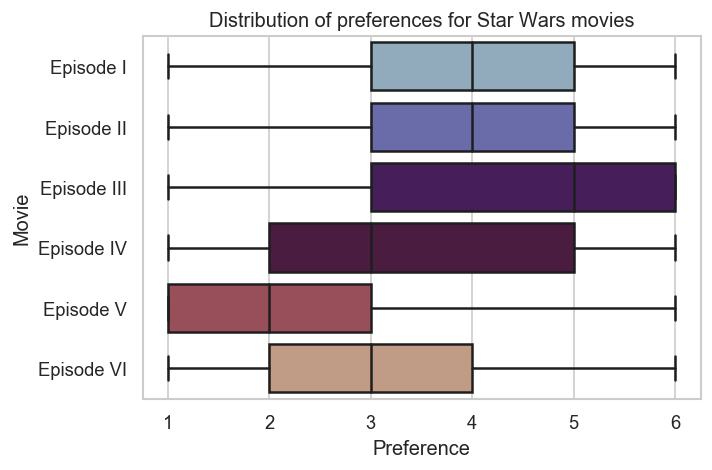

In [384]:
boxplot = sns.boxplot(x='value', y='variable', data=pd.melt(df, value_vars=['epI_preference', 
                        'epII_preference', 'epIII_preference', 'epIV_preference', 
                        'epV_preference','epVI_preference']).dropna(), palette='twilight')
boxplot.set_yticklabels(['Episode I', 'Episode II', 'Episode III', 'Episode IV', 
                         'Episode V', 'Episode VI'])
plt.xlabel("Preference")
plt.ylabel("Movie")
plt.title("Distribution of preferences for Star Wars movies");

Interestingly, we see a larger IQR for Episode III than almost all the other episodes, except Episode IV. This means that it is more debated than all the other episodes (except IV). We can also see that the IQR is shifted more towards the right hand side of the plot. This means that people tended to rate it on the lower side, which makes sense with what pop culture says about Episode III! (it had a pretty hokey romance plot, imo)

<img src='https://vignette.wikia.nocookie.net/starwars/images/a/a9/Anakin_Padme_Hug.png/revision/latest?cb=20140912041935' width="400">

Source: [Star Wars Fan Wiki](https://starwars.fandom.com/wiki/Skywalker_family)

## What do people think of Anakin and Darth Vader?
Now let's see if people regard Anakin and Darth Vader any differently! Do they
think of Anakin as a separate entity than Darth Vader? Or do they lump him into 
the same bucket of bad guy?

In [360]:
# creating a dataframe containing respondents feelings about Anakin and Darth 
# Vader as a single column on feelings and a column on what character they're 
# talking about
anakin_v_vader = pd.melt(df, value_vars =['favor_anakin', 'favor_darth_vader'])
anakin_v_vader.dropna(inplace=True)
anakin_v_vader.reset_index(inplace=True, drop=True)
anakin_v_vader.variable = pd.Series(np.where(anakin_v_vader.variable == 'favor_anakin', 'Anakin', 'Vader'))

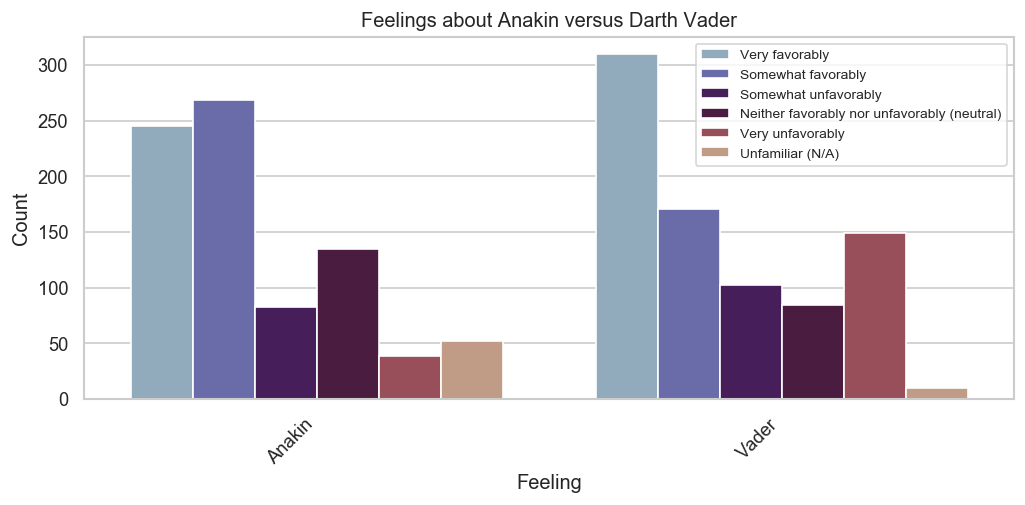

In [383]:
# plotting the favor of Anakin and Darth Vader
plt.figure(figsize=(10,4))
ax = sns.countplot(x='variable', hue="value", data=anakin_v_vader, palette='twilight')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xlabel("Feeling")
plt.ylabel("Count")
plt.title("Feelings about Anakin versus Darth Vader")
plt.legend(fontsize='small');

 <img src='https://i.insider.com/50a3be02ecad04c534000000?width=600' width=350> 
 <img src='https://lumiere-a.akamaihd.net/v1/images/Darth-Vader_6bda9114.jpeg?region=0%2C23%2C1400%2C785' width=350>

Sources: [Business Insider](https://www.businessinsider.com/anakin-skywalker-as-an-adult-all-grown-up-2012-11) and [StarWars.com](https://www.starwars.com/databank/darth-vader)

While I'd expected that people woukd view Darth Vader unfavorably, since he's
one of the 'bad guys', people might view him favorably - maybe they consider 
him an interesting or well written bad guy? The view of Anakin and Darth Vader
seem somewhat similarly positive. It turns out that not everyone associates 
Anakin with the cute kid and Darth Vader as the scary dude, like me! To 
further dive into this and quantify if the respondents' views of Anakin and 
Darth Vader really are significantly different, we utilize statistics - you'll 
learn this in our second unit of the curriculum!

## Your Turn! 
### Graphing the Proportion of Star Trek Fans 
- Can you add a title? 
- Axes labels? 
- What happens to the graph when you change 'twilight' to 'winter', 'vlag', or 'hot'? 
- Try replacing the column name with another column!

Use the above graphs as a reference - this is something we do _all the time_ when learning to code.

Again, it's okay if you can't figure it out right now -- we learn a lot about manipulating data just in the first week of the course!

In [409]:
sns.barplot(x = df.startrek_fan.value_counts().index, 
            y = df.startrek_fan.value_counts(), palette='twilight')
# plt.________(________)
# plt.________(________)
# plt.________(________);

## Predicting Star Trek Fans
We've explored the data a bit. Now let's see if we can predict whether someone
will be a fan of Star Trek based on the Star Wars data we have on them!

First, there's a little more we have to do to 

In [ ]:
# split up the data so that the model only sees part of it - that way we can test
# our model on unseen data